# Lyrics Generation Project - Data Analysis
## Milestone 1: Dataset Analysis and Insights

This notebook contains the exploratory data analysis for our lyrics generation project using the Spotify Million Song Dataset and Top 500 Songs dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go

# Set style for better visualizations
sns.set_theme()  # This will set both the style and palette

# Display all columns
pd.set_option('display.max_columns', None)

## 1. Data Loading and Initial Exploration

In [2]:
# Load the datasets
spotify_df = pd.read_csv('Spotify Million Song Dataset_exported.csv')
top500_df = pd.read_csv('Top 500 Songs.csv', encoding='latin-1')

print("Spotify Dataset Shape:", spotify_df.shape)
print("\nTop 500 Songs Dataset Shape:", top500_df.shape)

print("\nSpotify Dataset Columns:")
print(spotify_df.columns.tolist())

print("\nTop 500 Songs Dataset Columns:")
print(top500_df.columns.tolist())

Spotify Dataset Shape: (57650, 4)

Top 500 Songs Dataset Shape: (500, 9)

Spotify Dataset Columns:
['artist', 'song', 'link', 'text']

Top 500 Songs Dataset Columns:
['title', 'description', 'appears on', 'artist', 'writers', 'producer', 'released', 'streak', 'position']


## 2. Data Quality Analysis

In [3]:
# Check for missing values
print("Missing values in Spotify Dataset:")
print(spotify_df.isnull().sum())

print("\nMissing values in Top 500 Songs Dataset:")
print(top500_df.isnull().sum())

Missing values in Spotify Dataset:
artist    0
song      0
link      0
text      0
dtype: int64

Missing values in Top 500 Songs Dataset:
title            0
description      0
appears on       0
artist           0
writers          0
producer         0
released         0
streak           6
position       107
dtype: int64


## 3. Genre Analysis

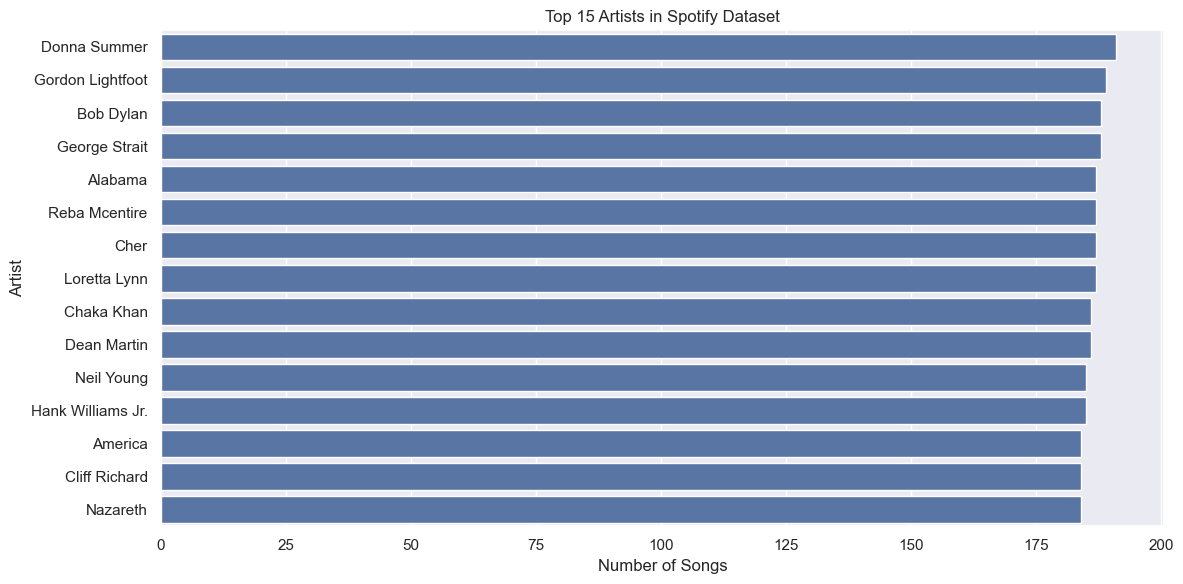

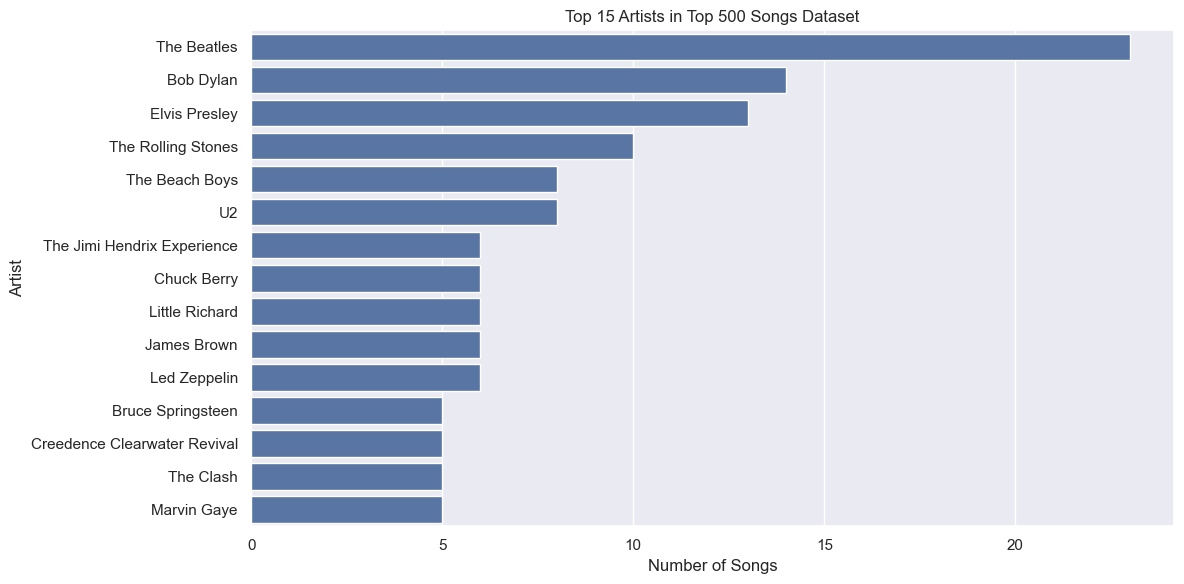

In [4]:
# Modify the function to analyze artist distribution
def plot_artist_distribution(df, title):
    plt.figure(figsize=(12, 6))
    artist_counts = df['artist'].value_counts().head(15)
    sns.barplot(x=artist_counts.values, y=artist_counts.index)
    plt.title(f'Top 15 Artists in {title}')
    plt.xlabel('Number of Songs')
    plt.ylabel('Artist')
    plt.tight_layout()
    plt.show()

# Plot for both datasets
plot_artist_distribution(spotify_df, 'Spotify Dataset')
plot_artist_distribution(top500_df, 'Top 500 Songs Dataset')

## 4. Artist Analysis

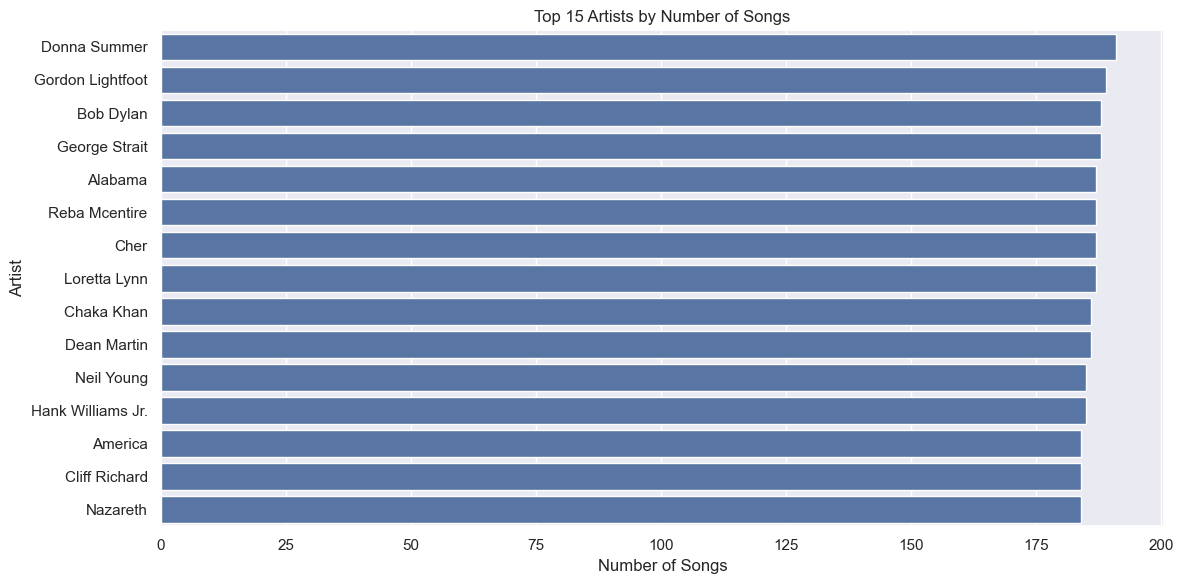

In [5]:
# Analyze top artists
plt.figure(figsize=(12, 6))
top_artists = spotify_df['artist'].value_counts().head(15)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 15 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

## 5. Lyrics Analysis (if available in the dataset)

In [6]:
# Function to create word cloud from lyrics
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create word clouds for both datasets if lyrics are available
# Adjust column names as needed
if 'lyrics' in spotify_df.columns:
    all_lyrics = ' '.join(spotify_df['lyrics'].dropna().astype(str))
    create_word_cloud(all_lyrics, 'Word Cloud of Spotify Dataset Lyrics')

if 'lyrics' in top500_df.columns:
    all_lyrics = ' '.join(top500_df['lyrics'].dropna().astype(str))
    create_word_cloud(all_lyrics, 'Word Cloud of Top 500 Songs Lyrics')

## 6. Song Features Analysis

In [7]:
# Analyze numerical features distribution
numerical_features = spotify_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(spotify_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

## 7. Correlation Analysis

In [8]:
# Create correlation matrix
# First, check if we have any numerical features
numerical_df = spotify_df.select_dtypes(include=['float64', 'int64'])
print("Available numerical features:")
print(numerical_df.columns.tolist())

if len(numerical_df.columns) > 0:
    correlation_matrix = numerical_df.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Song Features')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found in the dataset to create a correlation matrix.")
    print("Consider extracting numerical features from the text data or adding additional numerical columns for analysis.")

Available numerical features:
[]
No numerical features found in the dataset to create a correlation matrix.
Consider extracting numerical features from the text data or adding additional numerical columns for analysis.


## 8. Summary and Insights

Key findings from our data analysis:
1. [To be filled after running the analysis]
2. [To be filled after running the analysis]
3. [To be filled after running the analysis]

Limitations and considerations for our lyrics generation model:
1. [To be filled after running the analysis]
2. [To be filled after running the analysis]
3. [To be filled after running the analysis]

9. Features extraction


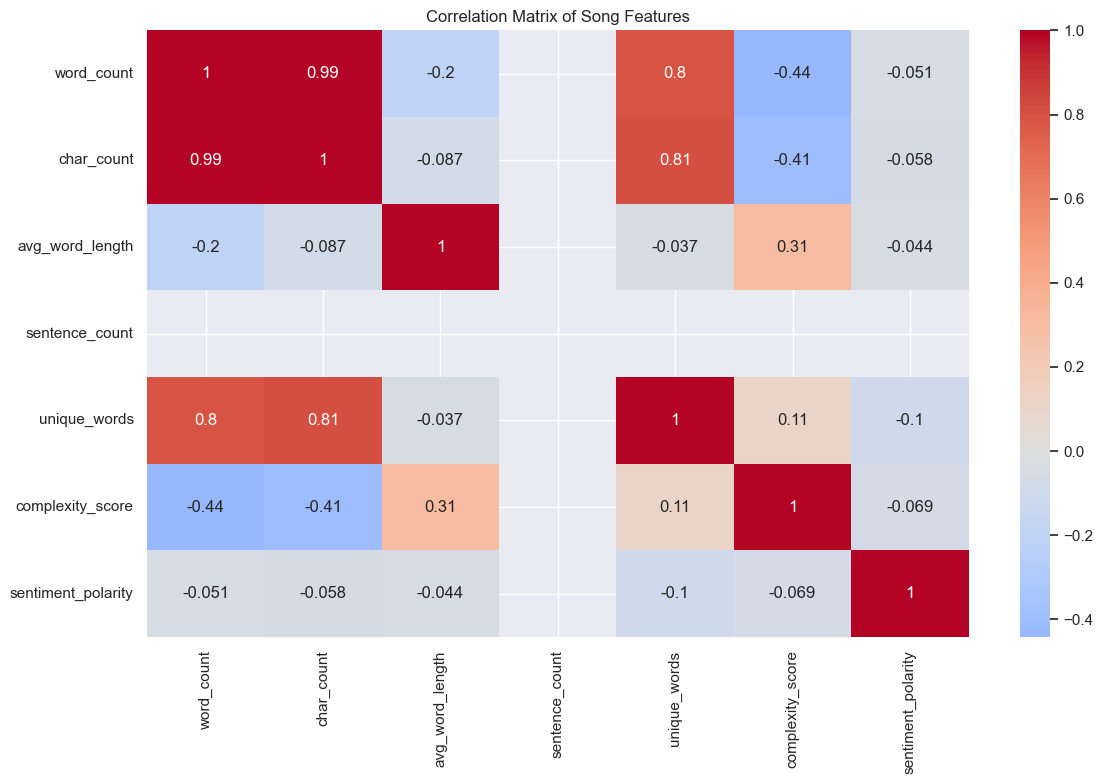

In [9]:
from feature_extraction import add_numerical_features

# Add numerical features to both datasets
spotify_df = add_numerical_features(spotify_df, 'text')
top500_df = add_numerical_features(top500_df, 'description')

# Now you can create correlation matrices and visualize relationships between features
numerical_features = spotify_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Song Features')
plt.tight_layout()
plt.show()

# Create correlation matrices for both datasets


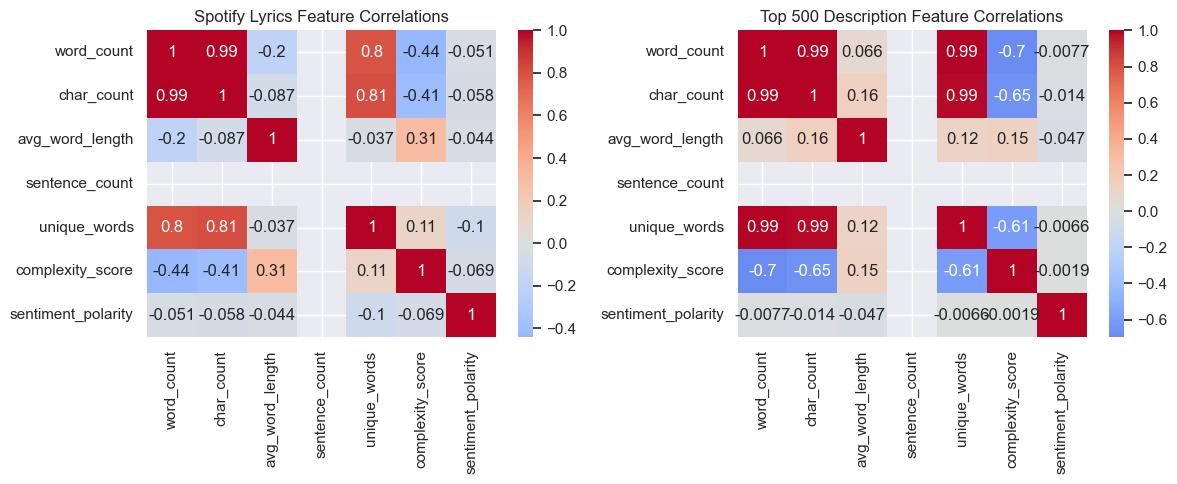

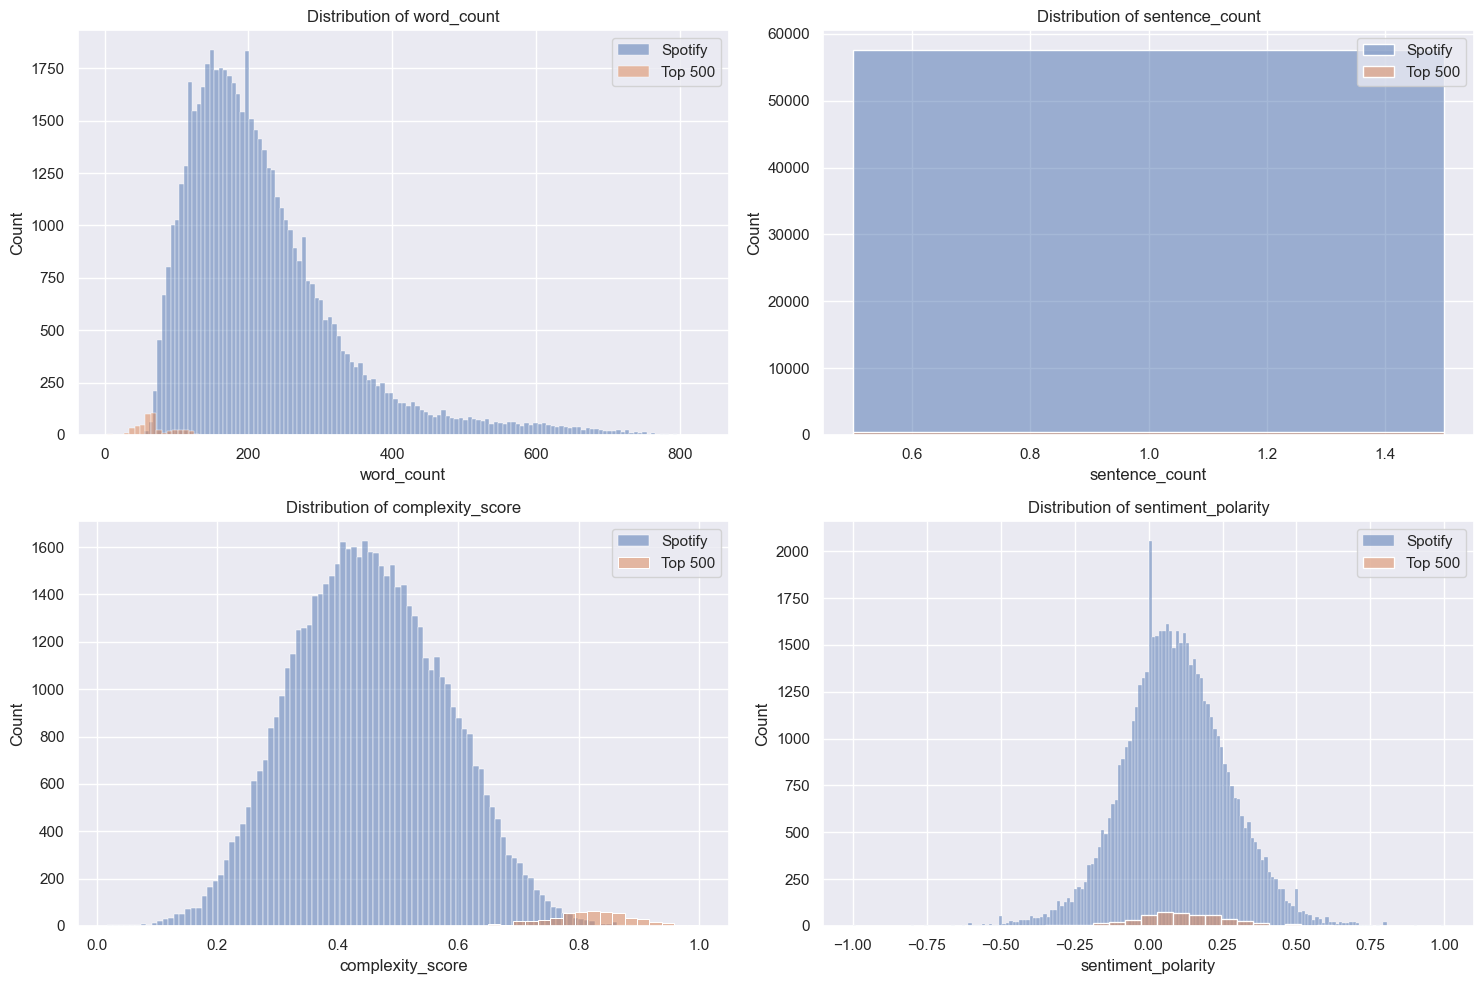

Spotify Lyrics Statistics:
         word_count  sentence_count  complexity_score  sentiment_polarity
count  57650.000000         57650.0      57650.000000        57650.000000
mean     219.223435             1.0          0.452446            0.092308
std      108.697818             0.0          0.125603            0.177839
min       37.000000             1.0          0.017500           -1.000000
25%      145.000000             1.0          0.362264           -0.018452
50%      195.000000             1.0          0.448659            0.086487
75%      263.000000             1.0          0.540101            0.203738
max      827.000000             1.0          0.946429            1.000000

Top 500 Description Statistics:
       word_count  sentence_count  complexity_score  sentiment_polarity
count  500.000000           500.0        500.000000          500.000000
mean    72.394000             1.0          0.820213            0.113158
std     32.146252             0.0          0.066787       

In [10]:
# Create correlation matrices for both datasets
spotify_corr = spotify_df[['word_count', 'char_count', 'avg_word_length', 
                          'sentence_count', 'unique_words', 'complexity_score', 
                          'sentiment_polarity']].corr()

top500_corr = top500_df[['word_count', 'char_count', 'avg_word_length', 
                         'sentence_count', 'unique_words', 'complexity_score', 
                         'sentiment_polarity']].corr()

# Visualize correlations using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Spotify correlations
plt.subplot(1, 2, 1)
sns.heatmap(spotify_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Spotify Lyrics Feature Correlations')

# Top 500 correlations
plt.subplot(1, 2, 2)
sns.heatmap(top500_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Top 500 Description Feature Correlations')

plt.tight_layout()
plt.show()

# Feature distributions
features = ['word_count', 'sentence_count', 'complexity_score', 'sentiment_polarity']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    
    # Plot Spotify distribution
    sns.histplot(spotify_df[feature], label='Spotify', alpha=0.5)
    
    # Plot Top 500 distribution
    sns.histplot(top500_df[feature], label='Top 500', alpha=0.5)
    
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

# Print basic statistics
print("Spotify Lyrics Statistics:")
print(spotify_df[features].describe())
print("\nTop 500 Description Statistics:")
print(top500_df[features].describe())